In [6]:
import pandas as pd
import urllib.request 

In [7]:
data_url = "/home/uncookie/Documents/datasets/foxes_database/"

In [14]:
df = pd.read_csv(data_url + "artcic_fox/arctic_fox.csv")
df.head

<bound method NDFrame.head of              id                                                url  \
0          4785       http://www.inaturalist.org/observations/4785   
1        187048     http://www.inaturalist.org/observations/187048   
2        187053     http://www.inaturalist.org/observations/187053   
3        187057     http://www.inaturalist.org/observations/187057   
4        198497     http://www.inaturalist.org/observations/198497   
...         ...                                                ...   
1040  192578370  https://www.inaturalist.org/observations/19257...   
1041  192832590  https://www.inaturalist.org/observations/19283...   
1042  192933052  https://www.inaturalist.org/observations/19293...   
1043  193097007  https://www.inaturalist.org/observations/19309...   
1044  193624088  https://www.inaturalist.org/observations/19362...   

                                              image_url  
0     https://inaturalist-open-data.s3.amazonaws.com...  
1     https:/

In [23]:
def get_dataset(df, dataset_name):
    for i in range(len(df)):
        urls = df['image_url']
        url = f'{urls[i]}'
        urllib.request.urlretrieve(url, f"data/{dataset_name}/{i}.png") 


In [24]:
get_dataset(df, 'arctic_fox')

In [62]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

batch_size = 8
img_height = 256
img_width = 256
data_dir = 'data'

In [63]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2*val_batches) // 3)
val_ds = val_ds.skip((2*val_batches) // 3)

Found 2256 files belonging to 2 classes.
Using 1805 files for training.
Found 2256 files belonging to 2 classes.
Using 451 files for validation.


2023-12-16 15:56:08.870785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1805]
	 [[{{node Placeholder/_0}}]]
2023-12-16 15:56:08.872564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1805]
	 [[{{node Placeholder/_4}}]]


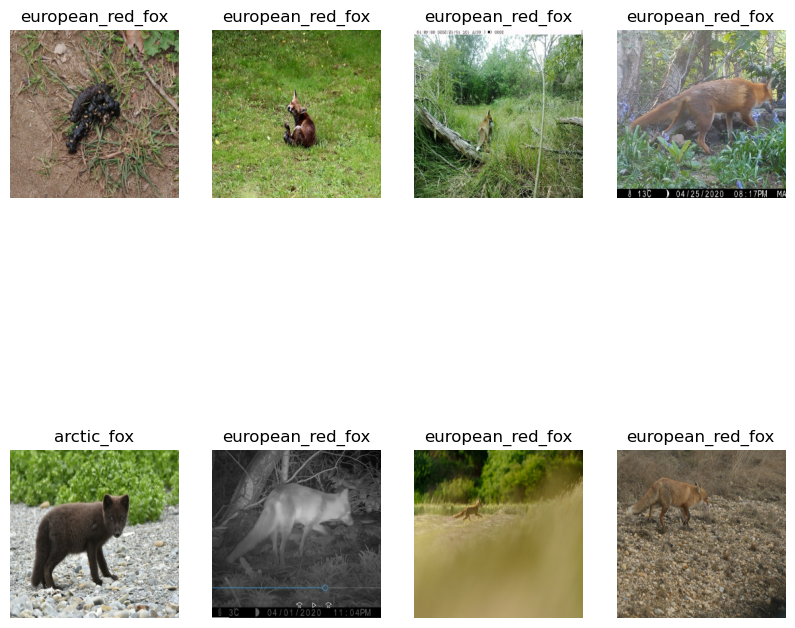

In [74]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [69]:
input = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1./255)(input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [70]:
for data_batch, _ in train_ds:
    print(data_batch.shape)
    break

(8, 256, 256, 3)


In [71]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30


226/226 [==============================] - 10s 30ms/step - loss: 0.6697 - accuracy: 0.6161 - val_loss: 0.6220 - val_accuracy: 0.6463
Epoch 2/30
226/226 [==============================] - 6s 27ms/step - loss: 0.6179 - accuracy: 0.6809 - val_loss: 0.5447 - val_accuracy: 0.6871
Epoch 3/30
226/226 [==============================] - 6s 26ms/step - loss: 0.5794 - accuracy: 0.7208 - val_loss: 0.5330 - val_accuracy: 0.8027
Epoch 4/30
226/226 [==============================] - 6s 27ms/step - loss: 0.5386 - accuracy: 0.7385 - val_loss: 0.4507 - val_accuracy: 0.7959
Epoch 5/30
226/226 [==============================] - 6s 26ms/step - loss: 0.5127 - accuracy: 0.7701 - val_loss: 0.4574 - val_accuracy: 0.7891
Epoch 6/30
226/226 [==============================] - 6s 27ms/step - loss: 0.4816 - accuracy: 0.7961 - val_loss: 0.5681 - val_accuracy: 0.7415
Epoch 7/30
226/226 [==============================] - 6s 28ms/step - loss: 0.4665 - accuracy: 0.7867 - val_loss: 0.3874 - val_accuracy: 0.8299
Epoch 8/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


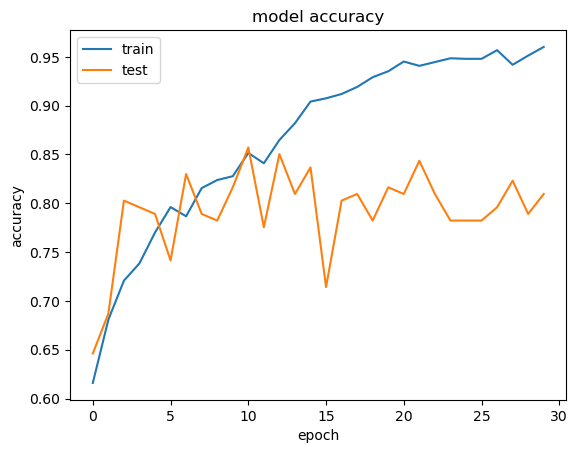

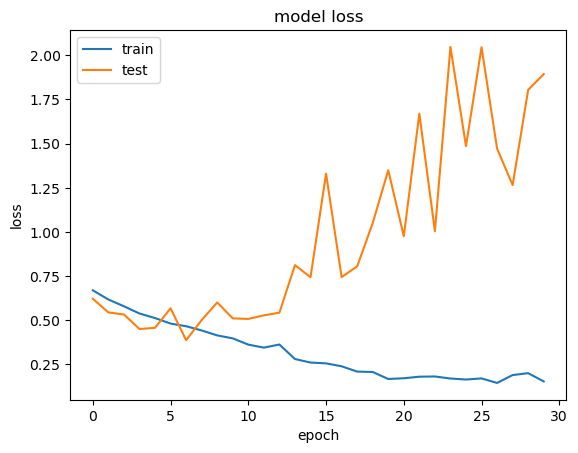

In [72]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
model.evaluate(test_ds)

2023-12-16 15:55:44.253861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [451]
	 [[{{node Placeholder/_4}}]]
2023-12-16 15:55:44.255447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [451]
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 1s 9ms/step - loss: 1.5544 - accuracy: 0.7928


[1.5543732643127441, 0.7927631735801697]